In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yaaryiitturan/raisin-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yaaryiitturan/raisin-dataset/versions/1


In [ ]:
import kagglehub

# Download the Raisin dataset
path = kagglehub.dataset_download("yaaryiitturan/raisin-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yaaryiitturan/raisin-dataset/versions/1


In [ ]:
import os

# Check contents of the directory
print(os.listdir(path))


['Raisin_Dataset.xlsx', 'Raisin_Dataset_new.xlsx']


In [ ]:
# Replace 'Raisin_Dataset.csv' with the actual file name from the directory listing
file_path = os.path.join(path, "Raisin_Dataset.xlsx")

import pandas as pd
# Load the dataset into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [ ]:
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [ ]:
df.dtypes

,0
Area,int64
MajorAxisLength,float64
MinorAxisLength,float64
Eccentricity,float64
ConvexArea,int64
Extent,float64
Perimeter,float64
Class,object


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
for col in df.columns:
  if col!='Class':
    scaler.fit_transform(df[[col]])

X=df.drop(columns='Class')
y=df['Class']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 principal components
X = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

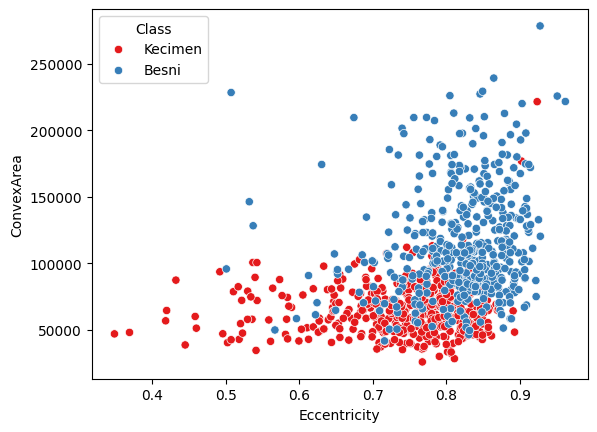

In [ ]:
#seeing if the data is linearly seperable

import seaborn as sns
import matplotlib.pyplot as plt

# Select two features for visualization (example: 'bill_length_mm' and 'flipper_length_mm')
sns.scatterplot(x='Eccentricity', y='ConvexArea', hue='Class', data=df, palette='Set1')
plt.show()


In [ ]:
from sklearn.svm import SVC

svc_model=SVC(kernel='linear',C=0.1)
svc_model.fit(X_train,y_train)

y_pred=svc_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8634920634920635